In [1]:
from keras import layers
from keras import models
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator

test_dir = "/home/asus/Desktop/Dataset_splits/test"

test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150), 
    batch_size=128,
    class_mode='categorical')

Found 1369 images belonging to 33 classes.


In [3]:
import tensorflow as tf 
modelload = tf.keras.models.load_model('anucolormodel.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
# score = modelload.evaluate_generator(test_generator, steps=40, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)

In [5]:
# score = modelload.evaluate_generator(test_generator, steps=80, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)

In [6]:
score = modelload.evaluate_generator(test_generator, steps=200, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)

200/200 [==============================] - 351s 2s/step - loss: 0.6344 - acc: 0.9042


In [7]:
from PIL import Image

img = Image.open("/home/asus/Desktop/5.jpg")
img_resize = img.resize((150,150))
np_image = np.array(img_resize)
np_image = np_image.reshape(1,150,150,3) * 1./255

In [8]:
color = modelload.predict(np_image)
prediction = color[0]
print(prediction)

[2.5324729e-09 3.2829881e-09 1.3969416e-08 2.1616606e-13 3.5060474e-12
 4.6619819e-10 1.9258964e-11 1.5680769e-11 3.7178838e-10 5.2716308e-19
 7.8086929e-13 9.6589425e-13 1.5235337e-10 5.6198804e-04 9.9932098e-01
 1.0482124e-06 4.9147125e-06 1.0810285e-04 5.7816836e-09 4.6108287e-08
 2.8440866e-06 6.6712135e-12 3.0324245e-09 6.8545447e-10 7.1265184e-08
 5.0921602e-12 1.5136933e-11 7.9518209e-10 2.6754304e-10 1.2970076e-10
 1.2062251e-08 1.8847849e-11 1.0137415e-09]


In [9]:
id_predict = np.argmax(modelload.predict(np_image))
print(id_predict)

14


In [10]:
names = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'GD_Alternia', 'GD_Deficiency', 'GD_Healthy', 'GD_Leaf_Blight', 'GD_Rust', 'GD_Spidermites', 'GD_Toxicity', 'GD_Webbloch', 'Paddy_Bacterial_leaf_blight', 'Paddy_Brown_spot', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy', 'pomo_Alternaria_Alternata', 'pomo_Anthracnose']
prediction_name = names[id_predict]

Pepper__bell___healthy


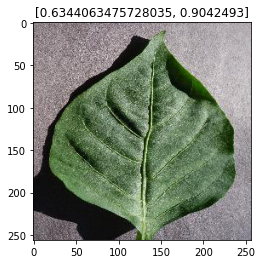

In [11]:
print(prediction_name)
plt.imshow(img)
plt.title(score)
plt.show()